In [21]:
import pandas as pd
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Bidirectional,LSTM,Dropout
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("stock_data.csv")

In [3]:
df

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL
...,...,...,...,...,...,...,...,...
19581,2017-11-06,178.56000,180.45000,178.31000,180.17000,13275578,0,FB
19582,2017-11-07,180.50000,180.74800,179.40300,180.25000,12903836,0,FB
19583,2017-11-08,179.79000,180.35000,179.11000,179.56000,10467606,0,FB
19584,2017-11-09,178.31000,179.40000,177.09000,179.30000,12602188,0,FB


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19586 entries, 0 to 19585
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     19586 non-null  object 
 1   Open     19586 non-null  float64
 2   High     19586 non-null  float64
 3   Low      19586 non-null  float64
 4   Close    19586 non-null  float64
 5   Volume   19586 non-null  int64  
 6   OpenInt  19586 non-null  int64  
 7   Stock    19586 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 1.2+ MB


In [5]:
df.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
Stock      0
dtype: int64

In [6]:
df["Stock"].value_counts()

AAPL    8364
MSFT    7983
TSLA    1858
FB      1381
Name: Stock, dtype: int64

So we have max data for Apple stock lets go with that

In [7]:
df1 = []

for i in range(0,len(df)):
    if df.loc[i,"Stock"] == "AAPL":
        df1.append(df.loc[i,:])
df1 = pd.DataFrame(df1)
df1

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL
...,...,...,...,...,...,...,...,...
8359,2017-11-06,171.75000,174.36000,171.10000,173.63000,34901241,0,AAPL
8360,2017-11-07,173.29000,174.51000,173.29000,174.18000,24424877,0,AAPL
8361,2017-11-08,174.03000,175.61000,173.71000,175.61000,24451166,0,AAPL
8362,2017-11-09,174.48000,175.46000,172.52000,175.25000,29533086,0,AAPL


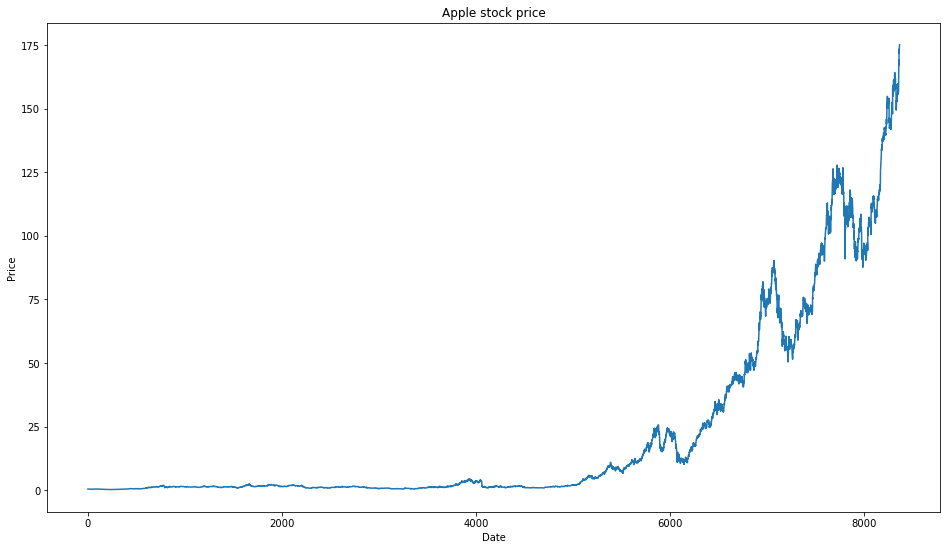

In [8]:
plt.figure(figsize= (16,9))
plt.plot(df1["Open"])
plt.title("Apple stock price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### SCALING THE DATA

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df1["Open"]).reshape(-1,1))

In [10]:
df2

array([[0.00109122],
       [0.00109122],
       [0.00109854],
       ...,
       [0.99382423],
       [0.99639747],
       [1.        ]])

### Splitting

In [11]:
##splitting dataset into train and test split
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [22]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), numpy.array(dataY)







### Another way to write the code above
# split a univariate sequence into samples
#def split_sequence(sequence, n_steps):
#   X, y = list(), list()
#	for i in range(len(sequence)):
#		# find the end of this pattern
#		end_ix = i + n_steps
#		# check if we are beyond the sequence
#		if end_ix > len(sequence)-1:
#			break
#		# gather input and output parts of the pattern
#		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
#		X.append(seq_x)
#		y.append(seq_y)
#	return array(X), array(y)

In [23]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
print(X_train.shape), print(y_train.shape)

(5335, 100)
(5335,)


(None, None)

In [25]:
print(X_test.shape), print(ytest.shape)

(2827, 100)
(2827,)


(None, None)

In [43]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Making our model

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
84/84 [==============================] - 10s 82ms/step - loss: 2.1880e-05 - val_loss: 0.0041
Epoch 2/100
84/84 [==============================] - 6s 72ms/step - loss: 1.5278e-06 - val_loss: 0.0027
Epoch 3/100
84/84 [==============================] - 6s 72ms/step - loss: 1.6273e-06 - val_loss: 0.0012
Epoch 4/100
84/84 [==============================] - 6s 72ms/step - loss: 1.2974e-06 - val_loss: 0.0012
Epoch 5/100
84/84 [==============================] - 6s 72ms/step - loss: 1.2545e-06 - val_loss: 8.8140e-04
Epoch 6/100
84/84 [==============================] - 6s 72ms/step - loss: 1.7665e-06 - val_loss: 8.3868e-04
Epoch 7/100
84/84 [==============================] - 6s 72ms/step - loss: 1.1565e-06 - val_loss: 0.0020
Epoch 8/100
84/84 [==============================] - 6s 72ms/step - loss: 1.1483e-06 - val_loss: 5.9258e-04
Epoch 9/100
84/84 [==============================] - 6s 72ms/step - loss: 1.2767e-06 - val_loss: 7.8454e-04
Epoch 10/100
84/84 [===========================

84/84 [==============================] - 6s 73ms/step - loss: 3.2354e-07 - val_loss: 5.1747e-04
Epoch 78/100
84/84 [==============================] - 6s 73ms/step - loss: 2.8352e-07 - val_loss: 8.0558e-04
Epoch 79/100
84/84 [==============================] - 6s 73ms/step - loss: 3.1945e-07 - val_loss: 5.2393e-04
Epoch 80/100
84/84 [==============================] - 6s 72ms/step - loss: 3.8853e-07 - val_loss: 0.0013
Epoch 81/100
84/84 [==============================] - 6s 72ms/step - loss: 3.1175e-07 - val_loss: 7.4326e-04
Epoch 82/100
84/84 [==============================] - 6s 72ms/step - loss: 4.2269e-07 - val_loss: 9.1148e-04
Epoch 83/100
84/84 [==============================] - 6s 72ms/step - loss: 3.1231e-07 - val_loss: 5.6133e-04
Epoch 84/100
84/84 [==============================] - 6s 72ms/step - loss: 2.9965e-07 - val_loss: 5.4661e-04
Epoch 85/100
84/84 [==============================] - 6s 72ms/step - loss: 2.6600e-07 - val_loss: 5.0571e-04
Epoch 86/100
84/84 [================

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [65]:
#inversing the ytest
ytest1=scaler.inverse_transform(ytest.reshape(-1, 1))
ytrain1 = scaler.inverse_transform(y_train.reshape(-1, 1))

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2.097672337475247

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

69.84244648087325

Text(0.5, 1.0, 'Prediction vs original (testing data)')

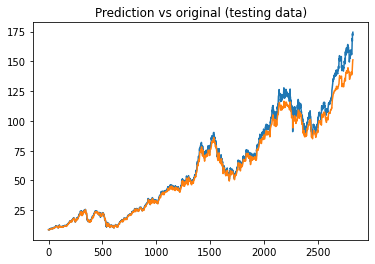

In [70]:
plt.plot(ytest1)
plt.plot(test_predict)
plt.title("Prediction vs original (testing data)")

Text(0.5, 1.0, 'Prediction vs original (training data)')

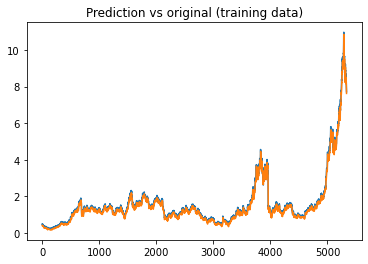

In [71]:
plt.plot(ytrain1)
plt.plot(train_predict)
plt.title("Prediction vs original (training data)")